# Desafio Cientista de Dados - Análise Estratégica para a Indústria Cinematográfica da PProductions


 Este projeto consiste em uma análise aprofundada de um banco de dados cinematográfico para o estúdio de Hollywood "PProductions". O objetivo é utilizar técnicas de análise de dados e modelagem preditiva para extrair insights valiosos que possam orientar a tomada de decisão sobre qual tipo de filme deve ser produzido a seguir. O trabalho envolve a exploração de dados, a formulação de hipóteses e a construção de um modelo de machine learning para prever o sucesso de um filme.


## Vizualização dos dados

Antes de colocar a mão na massa, vamos verificar se está tudo certinho com o nosso dataset.


### Importação dos dados

In [644]:

# Importando as bibliotecas necessárias
!pip install numpy pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [645]:
# Arquivo CSV direto do repositorio Github
url = "https://raw.githubusercontent.com/RafaelLima00/LH_CD_Rafael_Lima/main/data/desafio_indicium_imdb.csv"

# Leitura do arquivo CSV
df = pd.read_csv(url)

# Exibindo dataframe
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [646]:

df.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


## Análise exploratória dos dados (EDA)

**Agora vamos explorar a fundo os dados, para que possamos enteder quais serão as melhores maneiras de aproveitá los**.

In [647]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [648]:
# dataset apenas com colunas com valores numericos
df_num = df.select_dtypes(include=['float64', 'int64'])
# correlação das colunas
df_num.corr()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
Unnamed: 0,1.000000,-0.946472,-0.262064,-0.373076
IMDB_Rating,-0.946472,1.000000,0.271374,0.479308
Meta_score,-0.262064,0.271374,1.000000,-0.020091
No_of_Votes,-0.373076,0.479308,-0.020091,1.000000


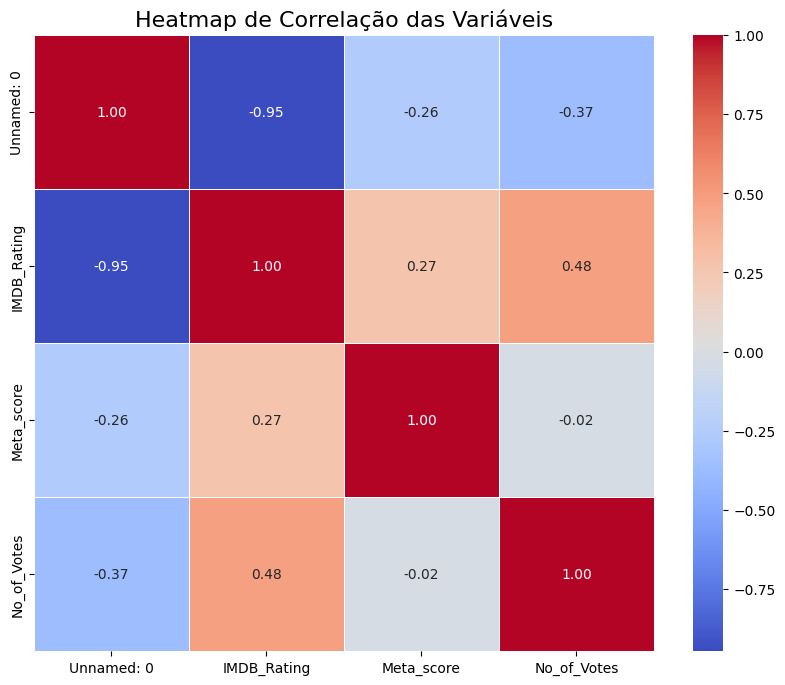

In [649]:
# Calculando a matriz de correlação
correlation_matrix = df_num.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlação das Variáveis", fontsize=16)
plt.show()

**Aqui podemos vê que aguns dados possuem uma relação muito forte, mas em sua maioria há uma relaçao muito forte.**

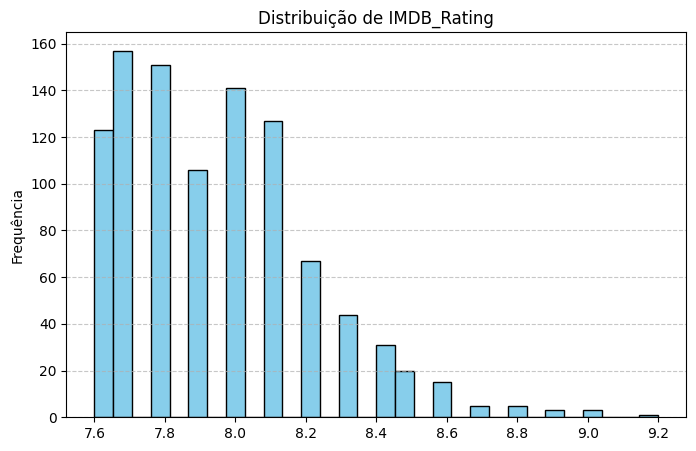

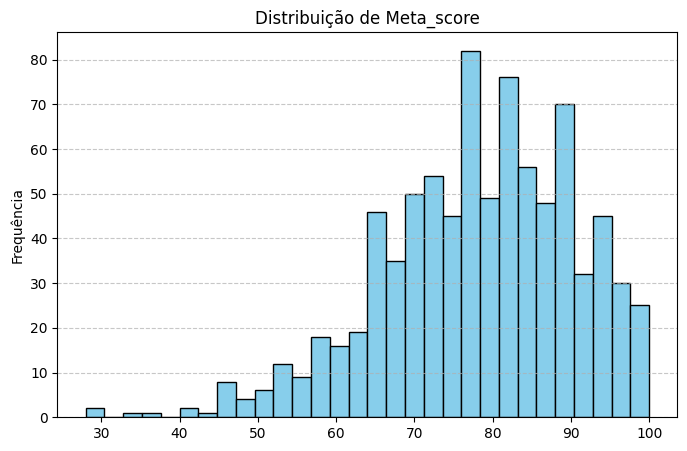

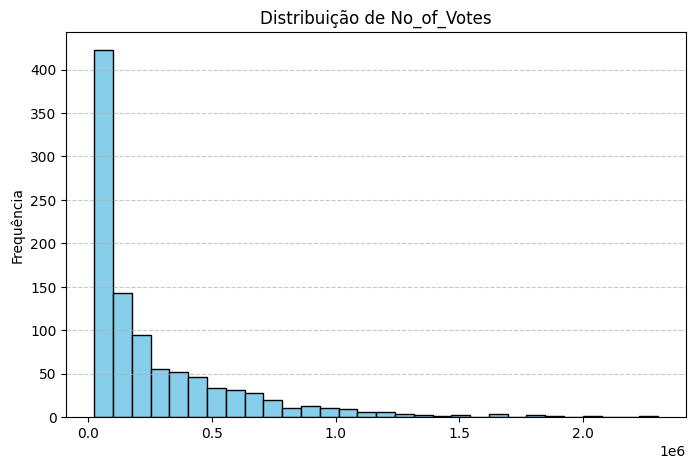

In [650]:
# A distribuição das variaveis Runtime, IMDB_Rating, Meta_score, No_of_Votes e Gross
variaveis = [ 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
# Usando Loop para criar os histogramas
for var in variaveis:
    plt.figure(figsize=(8, 5))
    plt.hist(df_num[var], bins=30, edgecolor='black', color='skyblue')
    plt.title(f"Distribuição de {var}")
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

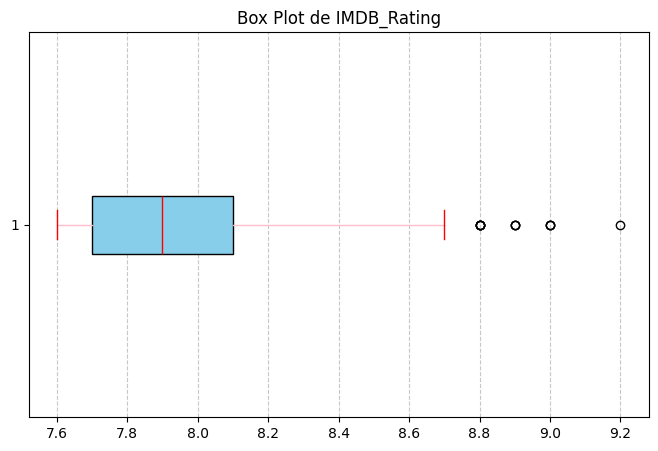

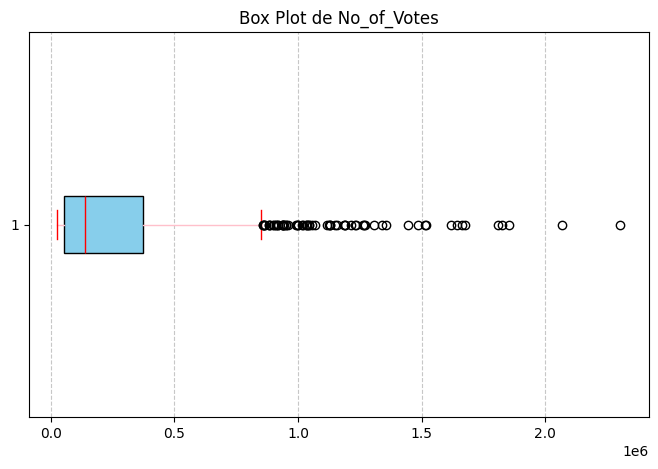

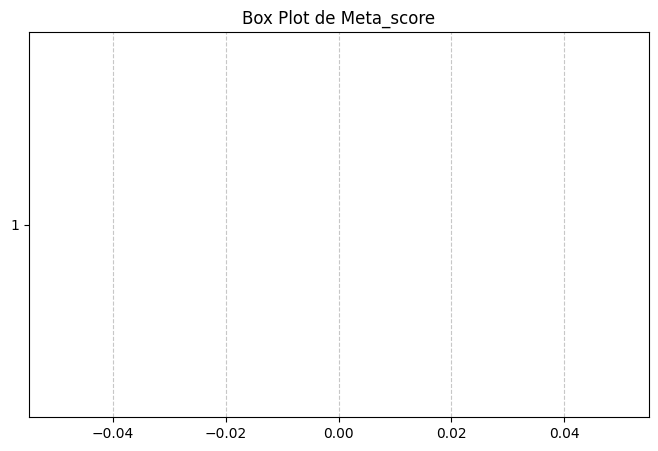

In [651]:
# A distribuição das variaveis Runtime, IMDB_Rating, Meta_score, No_of_Votes e Gross
variaveis = [ 'IMDB_Rating', 'No_of_Votes', 'Meta_score']

# Em Boxplot
for var in variaveis:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[var], vert=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='pink'),
                capprops=dict(color='red'))
    plt.title(f"Box Plot de {var}")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

### Hipóteses

Classificação Etária vs. Sucesso: Filmes com classificação etária mais branda (Certificate como U ou UA) alcançam um faturamento maior por atingirem um público mais amplo, embora talvez tenham notas médias ligeiramente menores.

Duração vs. Faturamento: Filmes com duração muito longa (acima de 180 minutos) podem ter um faturamento menor, pois isso limita o número de sessões diárias que um cinema pode exibir.

Gênero vs. Faturamento: Filmes de certos gêneros, como Ação, Aventura e Sci-Fi, tendem a ter um faturamento (Gross) significativamente maior do que gêneros como Drama, Romance ou Documentário.

## Limpeza e Feature engineering

A realização da limpeza e preparação dos dados é um passo muito importante, se for mal feita o resultado dificilmente será bom.

### Colunas

Series_Title – Nome do filme

Released_Year - Ano de lançamento

Certificate - Classificação etária

Runtime – Tempo de duração

Genre - Gênero

IMDB_Rating - Nota do IMDB

Overview - Overview do filme

Meta_score - Média ponderada de todas as críticas

Director – Diretor

Star1 - Ator/atriz #1

Star2 - Ator/atriz #2

Star3 - Ator/atriz #3

Star4 - Ator/atriz #4

No_of_Votes - Número de votos

Gross - Faturamento


Para podemos melhor exploar os dados, vou colocar as colunas em seus tipos certos


In [652]:
# Correção dos tipos das colunas

# Coluna Rountime
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Coluna Gross
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Coluna Released_Year
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df = df.astype({
    'Runtime': 'float64',
    'Gross': 'float64',
    'Released_Year': 'float64'
})

In [653]:
# Há linhas duplicadas?
df.duplicated().sum()

np.int64(0)

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(5), int64(2), object(9)
memory usage: 125.0+ KB


In [655]:
# verificando se há dados NULL no dataset
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,1
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [656]:
# Para não perder muitos dados por conta de valores nulos, decide não deletar as linhas e sim preencher com a media os valores nulo
# Dados NULL podem prejudicar nossa analise

media_meta_score = df['Meta_score'].mean()
df['Meta_score'].fillna(media_meta_score, inplace=True)

media_gross = df['Gross'].mean()
df['Gross'].fillna(media_gross, inplace=True)

df['Released_Year'].fillna(df['Released_Year'].mode()[0], inplace=True)

# Para a coluna da faxa etaria vamos inserir a moda nos valores nulos
moda_certificate = df['Certificate'].mode()[0]
df['Certificate'] = df['Certificate'].fillna(moda_certificate)

/tmp/ipython-input-3160320627.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(media_meta_score, inplace=True)
/tmp/ipython-input-3160320627.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [657]:
# Dados Nulls foram resolvidos?
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [658]:
# A coluna 'Unnamed: 0' é uma seguencia de numeros em ordem crescente que não está representando nada nos dados,  vamos remove-la para melhor eficiencia
df = df.drop(columns=['Unnamed: 0'])

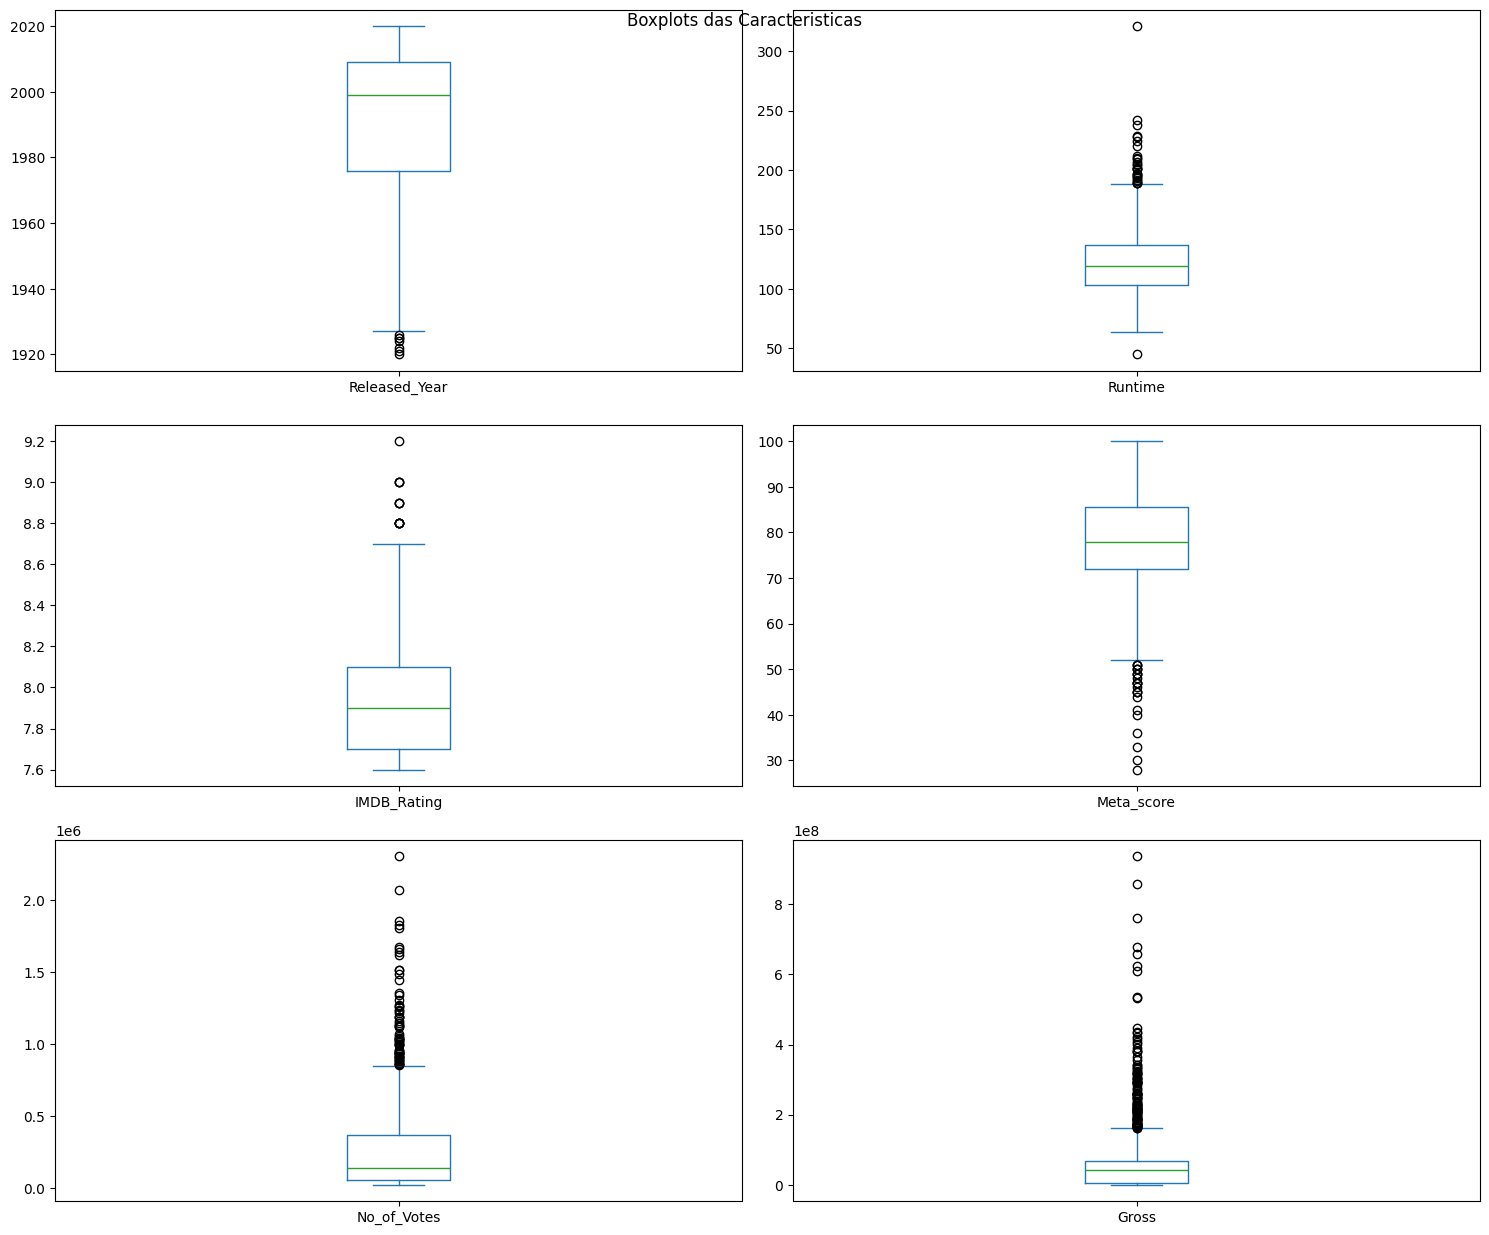

In [659]:
# Vou plotar um grafico de boxplot para verificar os outliers
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.plot(kind='box', subplots=True, layout=(6, 2), figsize=(15, 25))
plt.suptitle('Boxplots das Caracteristicas')
plt.tight_layout()
plt.show()

In [660]:
# Tratamento dos Outliers do df
from scipy.stats import zscore
def remove_outliers_zscore(df, columns, threshold=3):
    df = df.copy()
    for col in columns:
        z_scores = zscore(df[col])
        df = df[(np.abs(z_scores) <= threshold)]
    return df

numeric_columns = [
    'Runtime',
    'IMDB_Rating',
    'Meta_score',
    'No_of_Votes',
    'Gross',
    'Released_Year'
] # os que possuim mais outliers

# chamada da função
df = remove_outliers_zscore(df, numeric_columns)

print("Dados após remover outliers (Z-Score):")
df.info()

Dados após remover outliers (Z-Score):
<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 14 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   932 non-null    object 
 1   Released_Year  932 non-null    float64
 2   Certificate    932 non-null    object 
 3   Runtime        932 non-null    float64
 4   Genre          932 non-null    object 
 5   IMDB_Rating    932 non-null    float64
 6   Overview       932 non-null    object 
 7   Meta_score     932 non-null    float64
 8   Director       932 non-null    object 
 9   Star1          932 non-null    object 
 10  Star2          932 non-null    object 
 11  Star3          932 non-null    object 
 12  Star4          932 non-null    object 
 13  No_of_Votes    932 non-null    int64  
 14  Gross          932 non-null    float64
dtypes: float64(5), int64(1), object(9)
memory usage: 116.5+ KB


In [661]:
# vizualizar tabela
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
14,Goodfellas,1990.0,A,146.0,"Biography, Crime, Drama",8.7,The story of Henry Hill and his life in the mo...,90.000000,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,1020727,4.683639e+07
16,One Flew Over the Cuckoo's Nest,1975.0,A,133.0,Drama,8.7,A criminal pleads insanity and is admitted to ...,83.000000,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,1.120000e+08
17,Hamilton,2020.0,PG-13,160.0,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.000000,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,6.808257e+07
18,Gisaengchung,2019.0,A,132.0,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,96.000000,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,5.336784e+07
19,Soorarai Pottru,2020.0,U,153.0,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",77.969121,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,6.808257e+07


In [662]:
# Para melhor analise vammos separar a coluna do genero
genres = df['Genre'].str.split(', ', expand=True)
genres.columns = [f'Genre {i+1}' for i in range(genres.shape[1])]
df = pd.concat([df, genres], axis=1)

In [663]:
# Contar o número de gêneros na coluna original 'Genre'
df['Num_Genres'] = df['Genre'].str.split(',').apply(len)

In [664]:
# A Discrepância entre Crítica e Público as vezes, a diferença entre a nota da crítica (Meta_score) e a do público (IMDB_Rating) pode revelar muito sobre o tipo de filme.
meta_score_normalized = df['Meta_score'] / 10.0
df['Score_Diff'] = df['IMDB_Rating'] - meta_score_normalized

### One hot

In [665]:
# Separar os df
df_modelo = df.copy()
df_modelo = df_modelo.drop(columns=['Genre'])
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 14 to 998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   932 non-null    object 
 1   Released_Year  932 non-null    float64
 2   Certificate    932 non-null    object 
 3   Runtime        932 non-null    float64
 4   IMDB_Rating    932 non-null    float64
 5   Overview       932 non-null    object 
 6   Meta_score     932 non-null    float64
 7   Director       932 non-null    object 
 8   Star1          932 non-null    object 
 9   Star2          932 non-null    object 
 10  Star3          932 non-null    object 
 11  Star4          932 non-null    object 
 12  No_of_Votes    932 non-null    int64  
 13  Gross          932 non-null    float64
 14  Genre 1        932 non-null    object 
 15  Genre 2        834 non-null    object 
 16  Genre 3        602 non-null    object 
 17  Num_Genres     932 non-null    int64  
 18  Score_Diff    

In [666]:
# Vamos passar todas os int para float para os processo de one hot
int_cols = df_modelo.select_dtypes(include=['int64']).columns
df_modelo[int_cols] = df_modelo[int_cols].astype('float64')
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 14 to 998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   932 non-null    object 
 1   Released_Year  932 non-null    float64
 2   Certificate    932 non-null    object 
 3   Runtime        932 non-null    float64
 4   IMDB_Rating    932 non-null    float64
 5   Overview       932 non-null    object 
 6   Meta_score     932 non-null    float64
 7   Director       932 non-null    object 
 8   Star1          932 non-null    object 
 9   Star2          932 non-null    object 
 10  Star3          932 non-null    object 
 11  Star4          932 non-null    object 
 12  No_of_Votes    932 non-null    float64
 13  Gross          932 non-null    float64
 14  Genre 1        932 non-null    object 
 15  Genre 2        834 non-null    object 
 16  Genre 3        602 non-null    object 
 17  Num_Genres     932 non-null    float64
 18  Score_Diff    

/tmp/ipython-input-2711259412.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo[col], shade=True, color='orange')
/tmp/ipython-input-2711259412.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo[col], shade=True, color='orange')
/tmp/ipython-input-2711259412.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo[col], shade=True, color='orange')
/tmp/ipython-input-2711259412.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo[col], shade=True, color='orange')


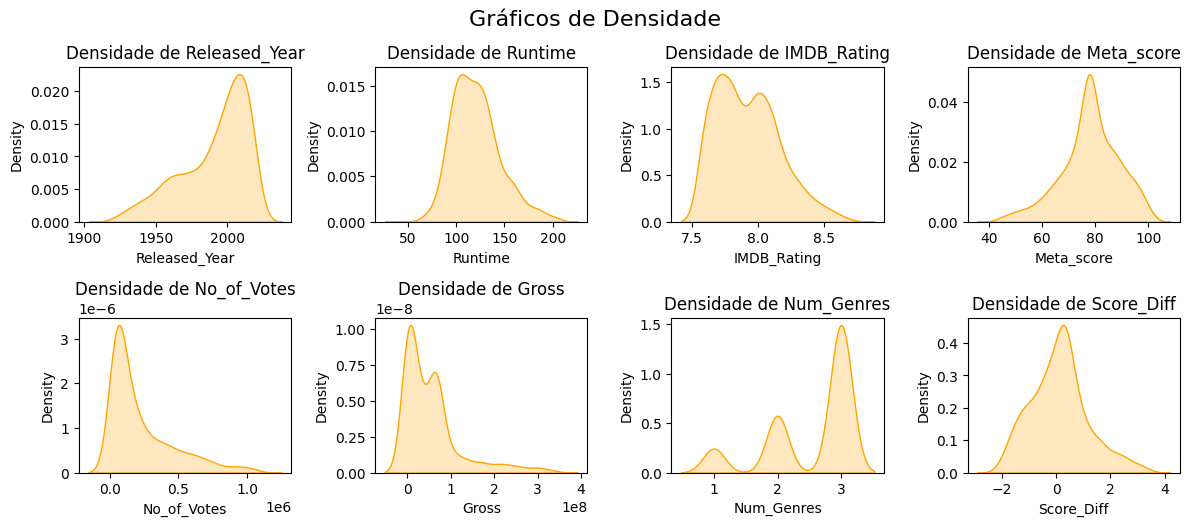

In [667]:
# Criar gráficos de densidade para todas as colunas numéricas
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_modelo.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df_modelo[col], shade=True, color='orange')
    plt.title(f'Densidade de {col}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Gráficos de Densidade', fontsize=16)
plt.show()

Com esse grafico podemos analisar qual tipo de normalização os dados precisam

In [668]:
# Vou utilizar dois tipos de tratamento de dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separar colunas para Min-Max e Standardization
# Colunas com distribuição que se assemelha à normal
colunas_standard = [
    'IMDB_Rating',
    'Meta_score',
    'Score_Diff'
]

# Colunas com distribuição enviesada (assimétrica) ou desconhecida
colunas_minmax = [
    'Released_Year',
    'Runtime',
    'No_of_Votes',
    'Gross',
    'Num_Genres',
]

# Aplicar Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_modelo[colunas_minmax] = scaler_minmax.fit_transform(df_modelo[colunas_minmax])

# Aplicar Standardization
scaler_standard = StandardScaler()
df_modelo[colunas_standard] = scaler_standard.fit_transform(df_modelo[colunas_standard])

df_modelo.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre 1,Genre 2,Genre 3,Num_Genres,Score_Diff
14,Goodfellas,0.696970,A,0.623457,3.232646,The story of Henry Hill and his life in the mo...,1.097423,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,0.953084,0.137239,Biography,Crime,Drama,1.0,-0.396091
16,One Flew Over the Cuckoo's Nest,0.545455,A,0.543210,3.232646,A criminal pleads insanity and is admitted to ...,0.454483,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,0.854832,0.328185,Drama,None,None,0.0,0.266551
17,Hamilton,1.000000,PG-13,0.709877,2.816280,The real life of one of America's foremost fou...,1.097423,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,0.028912,0.199496,Biography,Drama,History,1.0,-0.490755
18,Gisaengchung,0.989899,A,0.537037,2.816280,Greed and class discrimination threaten the ne...,1.648515,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,0.505136,0.156378,Comedy,Drama,Thriller,1.0,-1.058733
19,Soorarai Pottru,1.000000,U,0.666667,2.816280,"Nedumaaran Rajangam ""Maara"" sets out to make t...",-0.007597,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,0.028629,0.199496,Drama,None,None,0.0,0.648126


In [669]:
# Aplicar One-Hot Encoding para o gênero principal e faxa etaria
df_modelo = pd.get_dummies(df_modelo, columns=['Genre 1','Genre 2', 'Genre 3', 'Certificate'])
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 14 to 998
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          932 non-null    object 
 1   Released_Year         932 non-null    float64
 2   Runtime               932 non-null    float64
 3   IMDB_Rating           932 non-null    float64
 4   Overview              932 non-null    object 
 5   Meta_score            932 non-null    float64
 6   Director              932 non-null    object 
 7   Star1                 932 non-null    object 
 8   Star2                 932 non-null    object 
 9   Star3                 932 non-null    object 
 10  Star4                 932 non-null    object 
 11  No_of_Votes           932 non-null    float64
 12  Gross                 932 non-null    float64
 13  Num_Genres            932 non-null    float64
 14  Score_Diff            932 non-null    float64
 15  Genre 1_Action        932 n

### NLP

In [670]:
# Bibliotecas necessarias:
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('punkt')
!pip install spacy
!python -m spacy download pt_core_news_sm
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [671]:
# Colunas que serão tratadas
nao_num = df_modelo.select_dtypes(include='object')
nao_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 14 to 998
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series_Title  932 non-null    object
 1   Overview      932 non-null    object
 2   Director      932 non-null    object
 3   Star1         932 non-null    object
 4   Star2         932 non-null    object
 5   Star3         932 non-null    object
 6   Star4         932 non-null    object
dtypes: object(7)
memory usage: 58.2+ KB


In [672]:
# Funções para a limpeza do texto
def limpar_texto(texto):
    """Aplica a limpeza básica: minúsculas, remove pontuação e espaços extras."""
    if not isinstance(texto, str):
        return ''
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

def tokenizar_texto(texto):
    """Divide o texto em uma lista de palavras (tokens)."""
    return word_tokenize(texto)

def remover_stopwords(tokens):
    """Remove palavras comuns (stopwords) da lista de tokens."""
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [palavra for palavra in tokens if palavra not in stopwords]

def lematizar_tokens(tokens):
    """Reduz cada palavra da lista ao seu lema (forma base)."""
    # Junta os tokens para o Spacy processar como um documento
    texto_para_lematizar = " ".join(tokens)
    doc = nlp(texto_para_lematizar)
    # Extrai o lema de cada token
    lemas = [token.lemma_ for token in doc]
    return lemas


In [673]:
colunas_texto = [
    'Series_Title',
    'Overview',
    'Director',
    'Star1',
    'Star2',
    'Star3',
    'Star4'
]

# Loop para aplicar o pipeline de limpeza em cada coluna
print("Iniciando pré-processamento de texto...")
for coluna in colunas_texto:
    print(f"Processando coluna: {coluna}")
    nova_coluna = f'{coluna}_processado'
    df_modelo[nova_coluna] = df_modelo[coluna].apply(limpar_texto)
    df_modelo[nova_coluna] = df_modelo[nova_coluna].apply(tokenizar_texto)
    df_modelo[nova_coluna] = df_modelo[nova_coluna].apply(remover_stopwords)
    df_modelo[nova_coluna] = df_modelo[nova_coluna].apply(lematizar_tokens)

print("\nPré-processamento concluído!")

# Exibindo as primeiras linhas das colunas originais e das processadas para comparação
colunas_para_exibir = []
for col in colunas_texto:
    colunas_para_exibir.append(col)
    colunas_para_exibir.append(f'{col}_processado')

df_modelo[colunas_para_exibir].head()


Iniciando pré-processamento de texto...
Processando coluna: Series_Title
Processando coluna: Overview
Processando coluna: Director
Processando coluna: Star1
Processando coluna: Star2
Processando coluna: Star3
Processando coluna: Star4

Pré-processamento concluído!


,Series_Title,Series_Title_processado,Overview,Overview_processado,Director,Director_processado,Star1,Star1_processado,Star2,Star2_processado,Star3,Star3_processado,Star4,Star4_processado
14,Goodfellas,[goodfella],The story of Henry Hill and his life in the mo...,"[story, henry, hill, life, mob, cover, relatio...",Martin Scorsese,"[martin, scorsese]",Robert De Niro,"[robert, de, niro]",Ray Liotta,"[ray, liotta]",Joe Pesci,"[joe, pesci]",Lorraine Bracco,"[lorraine, bracco]"
16,One Flew Over the Cuckoo's Nest,"[one, fly, cuckoos, nest]",A criminal pleads insanity and is admitted to ...,"[criminal, plead, insanity, admit, mental, ins...",Milos Forman,"[milos, forman]",Jack Nicholson,"[jack, nicholson]",Louise Fletcher,"[louise, fletcher]",Michael Berryman,"[michael, berryman]",Peter Brocco,"[peter, brocco]"
17,Hamilton,[hamilton],The real life of one of America's foremost fou...,"[real, life, one, america, foremost, found, fa...",Thomas Kail,"[thomas, kail]",Lin-Manuel Miranda,"[linmanuel, miranda]",Phillipa Soo,"[phillipa, soo]",Leslie Odom Jr.,"[leslie, odom, jr]",Renée Elise Goldsberry,"[rene, elise, goldsberry]"
18,Gisaengchung,[gisaengchung],Greed and class discrimination threaten the ne...,"[greed, class, discrimination, threaten, newly...",Bong Joon Ho,"[bong, joon, ho]",Kang-ho Song,"[kangho, song]",Lee Sun-kyun,"[lee, sunkyun]",Cho Yeo-jeong,"[cho, yeojeong]",Choi Woo-sik,"[choi, woosik]"
19,Soorarai Pottru,"[soorarai, pottru]","Nedumaaran Rajangam ""Maara"" sets out to make t...","[nedumaaran, rajangam, maara, set, make, commo...",Sudha Kongara,"[sudha, kongara]",Suriya,[suriya],Madhavan,[madhavan],Paresh Rawal,"[paresh, rawal]",Aparna Balamurali,"[aparna, balamurali]"


## Perguntas do Desafio

### Qual filme você recomendaria para uma pessoa que você não conhece?


Para esse desafio vamos pegar os filmes mais bem avaliados para recomendar!


/tmp/ipython-input-1236349708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Series_Title', y='IMDB_Rating', data=df_sorted_rating, palette='viridis')


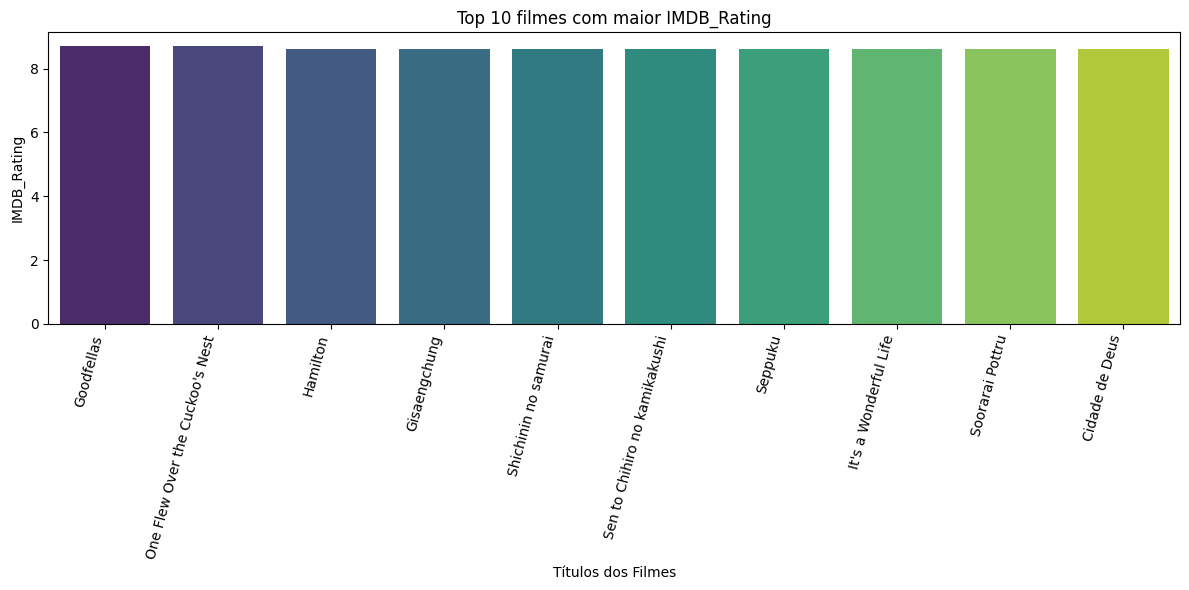

In [674]:
plt.figure(figsize=(12, 6))
plt.title("Top 10 filmes com maior IMDB_Rating")
df_sorted_rating = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
sns.barplot(x='Series_Title', y='IMDB_Rating', data=df_sorted_rating, palette='viridis')
plt.xlabel('Títulos dos Filmes')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


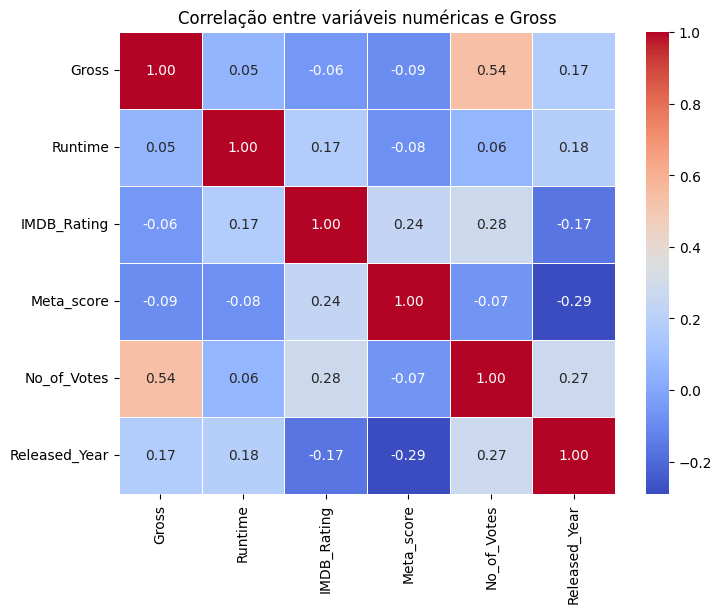

In [675]:
# variaveis que podem ter alguma relação mais proporcional com o preço (Coluna Gross)
df_var = df[['Gross', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Released_Year']]
corr = df_var.corr()

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre variáveis numéricas e Gross')
plt.show()

In [676]:
# Vamos agrupar por Genero principal e calcular suas estatísticas descritivas para sobre Faturamento (coluna 'Gross')
genero_fat = df.groupby('Genre 1')['Gross'].agg(['mean', 'median', 'std', 'sum'])
genero_fat_mean = genero_fat.style.format({'mean': '${:,.2f}','sum': '${:,.2f}','median': '${:,.2f}'})
print("Estatísticas descritivas do faturamento por Gênero Principal: \n MEDIA -   MEDIANA -   DESVIO PADRÃO - Total ")
display(genero_fat_mean)

Estatísticas descritivas do faturamento por Gênero Principal: 
 MEDIA -   MEDIANA -   DESVIO PADRÃO - Total 


,mean,median,std,sum
Genre 1,,,,
Action,"$84,666,168.97","$68,082,574.10",85358877.305094,"$12,615,259,176.14"
Adventure,"$79,829,315.28","$57,160,627.00",89775069.561637,"$5,109,076,178.15"
Animation,"$91,807,232.07","$68,082,574.10",97522330.000173,"$6,977,349,637.57"
Biography,"$60,495,452.28","$51,680,613.00",52171942.797384,"$5,142,113,443.94"
Comedy,"$38,729,297.08","$20,045,115.00",47427696.224342,"$6,003,041,046.83"
Crime,"$33,908,261.50","$16,137,014.00",46110798.282165,"$3,323,009,627.47"
Drama,"$39,760,002.90","$17,570,324.00",48018675.357487,"$10,934,000,796.77"
Family,"$4,000,000.00","$4,000,000.00",nan,"$4,000,000.00"
Fantasy,"$68,082,574.10","$68,082,574.10",nan,"$68,082,574.10"


In [677]:
# Agora agrupar por classificação etaria e calcular suas estatísticas descritivas para sobre Faturamento (coluna 'Gross')
genero_fat = df.groupby('Certificate')['Gross'].agg(['mean', 'median', 'std', 'sum'])
genero_fat_mean = genero_fat.style.format({'mean': '${:,.2f}','sum': '${:,.2f}','median': '${:,.2f}'})
print("Estatísticas descritivas do faturamento por Classificação etaria: \n MEDIA -   MEDIANA -   DESVIO PADRÃO - Total ")
display(genero_fat_mean)

Estatísticas descritivas do faturamento por Classificação etaria: 
 MEDIA -   MEDIANA -   DESVIO PADRÃO - Total 


,mean,median,std,sum
Certificate,,,,
16,"$68,082,574.10","$68,082,574.10",nan,"$68,082,574.10"
A,"$60,979,464.01","$47,000,000.00",60961360.190450,"$10,915,324,057.68"
Approved,"$34,736,995.87","$23,650,000.00",32465827.160369,"$382,106,954.52"
G,"$52,677,367.10","$41,813,617.00",60730760.925030,"$632,128,405.21"
GP,"$708,958.00","$708,958.00",946783.453097,"$1,417,916.00"
PG,"$35,524,108.71","$30,177,511.00",30750049.941364,"$1,314,392,022.36"
PG-13,"$40,696,837.45","$18,254,702.00",50897956.419207,"$1,668,570,335.42"
Passed,"$25,703,707.39","$8,000,000.00",30256065.545325,"$873,926,051.15"
R,"$25,771,236.03","$7,220,243.00",42399640.360597,"$3,633,744,280.15"


### Quais insights podem ser tirados com a coluna?

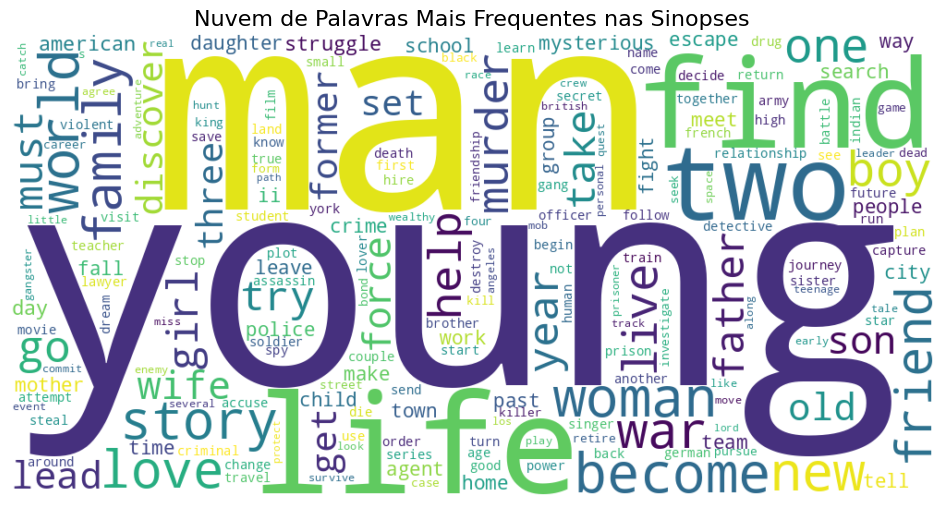

In [678]:
# Criação de um nuvem de palavras para saber quias são as palavras mais frenguentes
from wordcloud import WordCloud
from collections import Counter

# Vou juntar todas elas em uma lista gigante de palavras.
all_words = [palavra for lista in df_modelo['Overview_processado'].dropna() for palavra in lista]
word_counts = Counter(all_words)
wc = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Mais Frequentes nas Sinopses', fontsize=16)
plt.show()

### (Overview) É possível inferir o gênero do filme a partir dessa coluna?


Com certeza, e meu plano para isso é  basicamente ensinar o meu modelo a ser um detetive de sinopses. A ideia é contar a frequência de palavras-chave: se ele começar a ver "nave espacial", "alienígena" e "galáxia" muitas vezes em um texto, ele vai gritar "FICÇÃO CIENTÍFICA!". Se encontrar "amor", "coração partido" e "encontro", ele vai apostar em "ROMANCE".

## Construção do Modelo

**Eu escolhi o modelo de RandomForestRegressor porque ele é simples, eficiente e adequado para problemas de previsão além de conseguir os melhores resultados (fiz a comparação), como prever as notas do imdb. Além disso, ele permite interpretar a relação entre as variáveis explicativas e o alvo, ajudando a entender quais fatores influenciam mais o Nota**

#### Entedendo as Relações da coluna IMDB_Rating com as outras


Como o objetivo principal é fazer um modelo voltado para prever notas, vamos entender como a coluna IMDB_Rating se relacionar com as outras colunas.

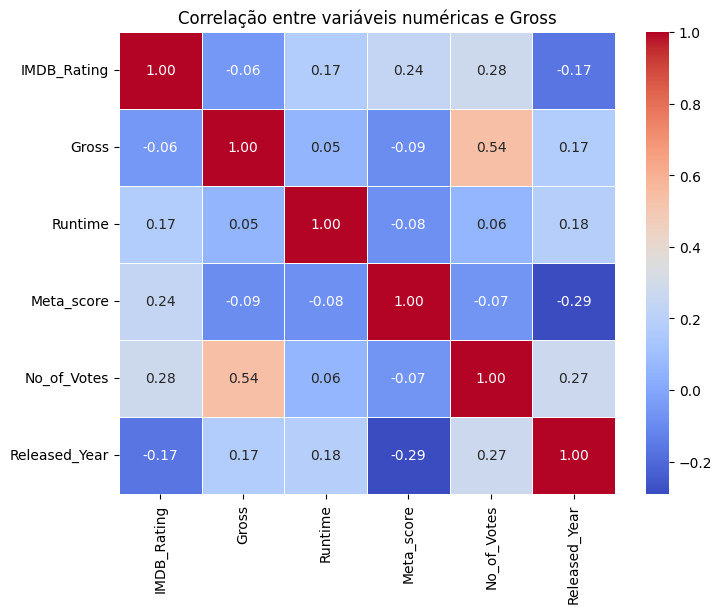

In [679]:
# variaveis que podem ter alguma relação mais proporcional com IMDB_Rating
df_var = df[[ 'IMDB_Rating', 'Gross', 'Runtime','Meta_score', 'No_of_Votes', 'Released_Year']]
corr = df_var.corr()

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre variáveis numéricas e Gross')
plt.show()

### Bibliotecas

In [680]:

# bibliotecas necessárias para o Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pickle #pkl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

### Finalizando os dados

In [681]:
# As colunas para caber no modelo precisarão ser vetorizadas

colunas_texto_processado = [
    'Director_processado',
    'Star1_processado',
    'Star2_processado',
    'Star3_processado',
    'Star4_processado'
]

#'Series_Title_processado' e 'Overview_processado'estão fazendo ruidos no resultado final
# Junte as listas de palavras (tokens) em uma única string para cada filme.
texto_combinado = df_modelo[colunas_texto_processado].apply(
    lambda row: ' '.join([' '.join(tokens) for tokens in row]),
    axis=1
)
vectorizer = TfidfVectorizer(max_features=80)
X_texto_vetorizado = vectorizer.fit_transform(texto_combinado)
df_tfidf = pd.DataFrame(X_texto_vetorizado.toarray(), columns=vectorizer.get_feature_names_out())
df_final_modelo = df_modelo.drop(columns=colunas_texto_processado)
df_final_modelo.reset_index(drop=True, inplace=True)
df_tfidf.reset_index(drop=True, inplace=True)
df_final_modelo = pd.concat([df_final_modelo, df_tfidf], axis=1)
df_final_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Columns: 166 entries, Series_Title to woody
dtypes: bool(69), float64(88), object(9)
memory usage: 769.2+ KB


In [682]:
# Tirando o dados object do df
df_final_modelo = df_final_modelo.select_dtypes(include=['float64', 'bool'])
df_final_modelo.head()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Num_Genres,Score_Diff,Genre 1_Action,Genre 1_Adventure,...,sean,stanley,thomas,tim,tom,tony,walter,william,williams,woody
0,0.696970,0.623457,3.232646,1.097423,0.953084,0.137239,1.0,-0.396091,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.545455,0.543210,3.232646,0.454483,0.854832,0.328185,0.0,0.266551,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.709877,2.816280,1.097423,0.028912,0.199496,1.0,-0.490755,False,False,...,0.0,0.0,0.692767,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.989899,0.537037,2.816280,1.648515,0.505136,0.156378,1.0,-1.058733,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.666667,2.816280,-0.007597,0.028629,0.199496,0.0,0.648126,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [683]:
# Variáveis preditoras (X) e a variável alvo (y)
x = df_final_modelo.drop(columns=['IMDB_Rating', 'Score_Diff'])   # Removendo colunas alvo
y = df_final_modelo['IMDB_Rating']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo e Pkl

In [684]:
with open('scaler_final.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('colunas_modelo_final.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

with open('modelo.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

# ao Criar o modelo de Regressão Linear não teve o melhor resultado
modelo_lr = LinearRegression()

# Melhor modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=32)

# Treinando o modelo
modelo.fit(X_train_scaled, y_train)

# Fazendo as previsões
y_pred = modelo.predict(X_test_scaled)


### Avaliação

In [685]:

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
r2 = r2_score(y_test, y_pred)  # R² (coeficiente de determinação)
mae = mean_absolute_error(y_test, y_pred) # MAE (Erro Absoluto Médio)

# Exibindo os resultados
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')
print(f'MAE (Erro Absoluto Médio): {mae:.4f}')

MSE (Erro Quadrático Médio): 0.5056420519683583
R² (Coeficiente de Determinação): 0.4707540780215447
MAE (Erro Absoluto Médio): 0.5514


*Análise Detalhada das Novas Métricas*

**MSE (Erro Quadrático Médio) = 0.505**

Para interpretar melhor, tiramos a raiz quadrada (RMSE): √0.505 ≈ 0.64. Isso quer dizer que, em média, as previsões do modelo estão errando por cerca de 0.64 pontos na escala de 0 a 10.


**R² (Coeficiente de Determinação) = 0.470**

Modelo agora consegue explicar aproximadamente 47.0% da variação nas notas do IMDB. Isso significa que ele é oficialmente melhor do que um simples palpite baseado na média.

**MAE (Erro Absoluto Médio) = 0.5514**

 Em média, as previsões estão errando por apenas 0.55 pontos (pouco mais de meio ponto) para mais ou para menos.


Reconheço que ainda estou aprendendo e que, com o tempo e prática,serei capaz de criar modelos mais robustos e precisos.

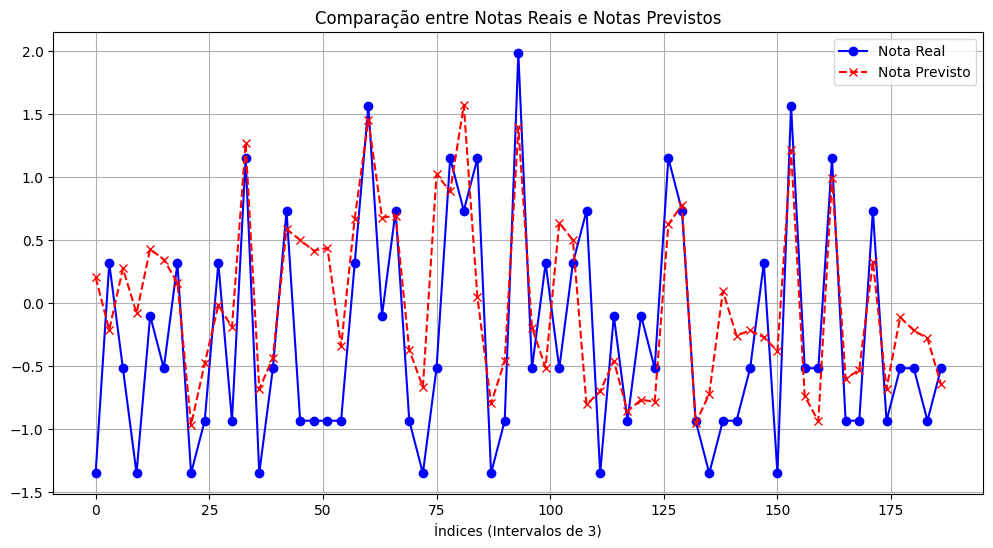

In [686]:
# Criando intervalos de 3 nos índices
intervalos = range(0, len(y_test), 3)

# Convertendo os dados para listas, para garantir compatibilidade com os índices
y_test_list = y_test.values.tolist()
y_pred_list = y_pred.tolist()

# Filtrando os valores reais e previstos nos intervalos
y_test_interval = [y_test_list[i] for i in intervalos]
y_pred_interval = [y_pred_list[i] for i in intervalos]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(intervalos, y_test_interval, label='Nota Real', color='blue', marker='o')
plt.plot(intervalos, y_pred_interval, label='Nota Previsto', color='red', linestyle='--', marker='x')
plt.title('Comparação entre Notas Reais e Notas Previstos')
plt.xlabel('Índices (Intervalos de 3)')
plt.legend()
plt.grid(True)
plt.show()


In [687]:
# Comparando modelos:
# Modelo linear Regression
# Treinando o modelo

modelo_lr.fit(X_train_scaled, y_train)
y_pred2 = modelo_lr.predict(X_test_scaled)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred2)  # Erro quadrático médio
r2 = r2_score(y_test, y_pred2)  # R² (coeficiente de determinação)
mae = mean_absolute_error(y_test, y_pred2) #MAE (Erro Absoluto Médio)

# Exibindo os resultados
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')
print(f'MAE (Erro Absoluto Médio): {mae:.4f}')

MSE (Erro Quadrático Médio): 0.642995232970262
R² (Coeficiente de Determinação): 0.3269891149749682
MAE (Erro Absoluto Médio): 0.6492


**R² (Coeficiente de Determinação) = 0.33**

explicar 33% da variação nas notas do IMDB.

**MSE (Erro Quadrático Médio) = 0.64**

O RMSE (Raiz do Erro Quadrático Médio) agora é ≈ 0.80. Isso significa que o erro médio está em torno de 0.80 pontos na escala de 0 a 10.


**MAE (Erro Absuto Médio) = 0.65**

Em média, as previsões estão errando por 0.65 pontos, o que confirma o RMSE.

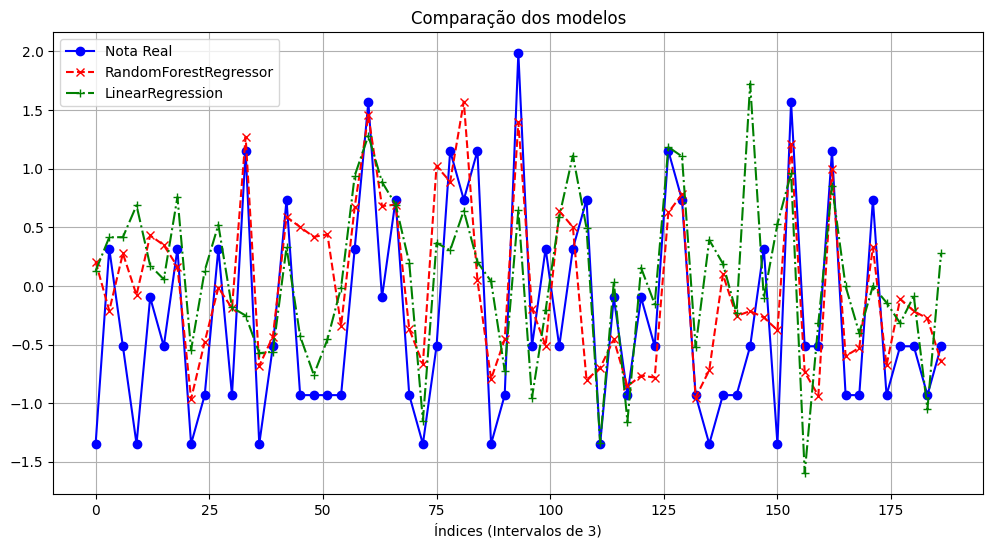

In [688]:
# Criando intervalos de 3 nos índices
intervalos = range(0, len(y_test), 3)

# Convertendo os dados para listas, para garantir compatibilidade com os índices
y_test_list = y_test.values.tolist()
y_pred_list = y_pred.tolist()
y_pred2_list = y_pred2.tolist()

# Filtrando os valores reais e previstos nos intervalos
y_test_interval = [y_test_list[i] for i in intervalos]
y_pred_interval = [y_pred_list[i] for i in intervalos]
y_pred2_interval = [y_pred2_list[i] for i in intervalos]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(intervalos, y_test_interval, label='Nota Real', color='blue', marker='o')
plt.plot(intervalos, y_pred_interval, label='RandomForestRegressor', color='red', linestyle='--', marker='x')
plt.plot(intervalos, y_pred2_interval, label='LinearRegression', color='green', linestyle='-.', marker='+')
plt.title('Comparação dos modelos')
plt.xlabel('Índices (Intervalos de 3)')
plt.legend()
plt.grid(True)
plt.show()


## Testando no Exemplo

In [689]:
# Exemplo fornecido
exemplo = {
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': 142,
 'Genre': 'Drama',
 'Num_Genres': 1,
 'IMDB_Rating': 9.3, # Include IMDB_Rating in the example dictionary
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469
 }

# Carregando o modelo treinado
with open('modelo.pkl', 'rb') as f: modelo = pickle.load(f)
with open('scaler_final.pkl', 'rb') as f: scaler = pickle.load(f)
with open('colunas_modelo_final.pkl', 'rb') as f: colunas_do_modelo = pickle.load(f)

# Transformar o exemplo em DataFrame
exemplo_df = pd.DataFrame([exemplo])

genres = exemplo_df['Genre'].str.split(', ', expand=True)
for i in range(genres.shape[1]):
    exemplo_df[f'Genre {i+1}'] = genres[i]
exemplo_df['Num_Genres'] = exemplo_df['Genre'].str.split(',').apply(len)
exemplo_df['Score_Diff'] = exemplo_df['IMDB_Rating'] - (exemplo_df['Meta_score'] / 10.0)

colunas_para_dummies = [col for col in ['Genre 1', 'Genre 2', 'Genre 3', 'Certificate'] if col in exemplo_df.columns]
exemplo_df = pd.get_dummies(exemplo_df, columns=colunas_para_dummies)
exemplo_df = exemplo_df.drop(columns=['IMDB_Rating', 'Series_Title', 'Overview', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'], errors='ignore')
exemplo_df_aligned = exemplo_df.reindex(columns=colunas_do_modelo, fill_value=0)
exemplo_df_scaled = scaler.transform(exemplo_df_aligned)

# Realize a previsão
previsao_nota = modelo.predict(exemplo_df_scaled)
print(f'Nota IMDB Prevista: {previsao_nota[0]:.2f}')

Nota IMDB Prevista: 0.83


A nota prevista foi muito discrepante apesar de quebrar muito a cabeça eu não conseguir encontrar o porque.


## Agradecimento


**Quero agradecer pela oportunidade de participar deste processo seletivo. A experiência de responder às questões e desafios propostos foi valioso e desafiador, contribuiu para o meu aprendizado. Este processo me permitiu expandir meus conhecimentos e habilidades, ao mesmo tempo em que me motiva a continuar me aprimorando. Obrigado novamente pela experiência e pelo tempo que será dedicado à avaliação do meu trabalho. :)**
